<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Customizing Ticks](04.10-Customizing-Ticks.ipynb) | [Contents](Index.ipynb) | [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.11-Settings-and-Stylesheets.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 客製化Matplotlib: 系統配置和樣式表

## 手動自訂圖表



In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

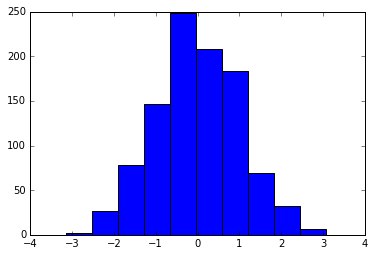

In [2]:
# 建立一個預設的直方圖
x = np.random.randn(1000)
plt.hist(x);

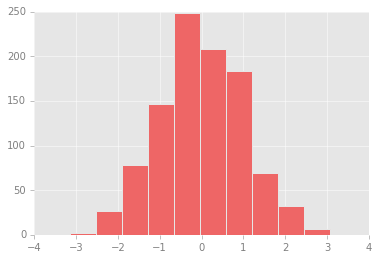

In [15]:
# 使用一個灰色的背景
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# 畫上白色的實心格線
plt.grid(color='w', linestyle='solid')

# 隱藏圖片的框框
for spine in ax.spines.values():
    spine.set_visible(False)
    
# 隱藏上排和右排的刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 讓刻度和標籤淡一些
ax.tick_params(colors='gray', direction='out') # 刻度線在外
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# 控制直方圖的填滿和邊緣顏色
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

有個方法可做一次預設值，然後套用到所有的圖表。

## 變動預設值: ``rcParams``

每一次Matplotlib載入時，會定義一個執行配置(runtime configuration, rc)包含每一個建立之圖表元素的預設樣式。可以使用plt.rc隨時調整這個配置。

先從儲存一個複本到``rcParams``目錄開始，如此可以在目前的工作階段中很容易重置這些改變:

In [16]:
IPython_default = plt.rcParams.copy()

In [17]:
# 使用plt.rc函式去改變這些設定的其中一部份:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

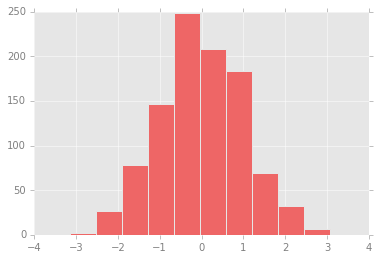

In [18]:
# 看一下設定的成果
plt.hist(x);

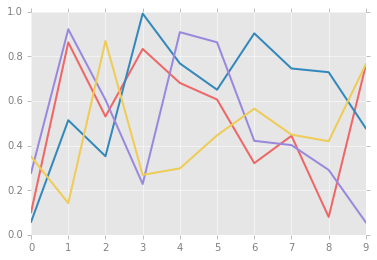

In [20]:
# 檢視rc參數在一個簡單的線條圖
for i in range(4):
    plt.plot(np.random.rand(10))

## 樣式表

``style``模組包含許多新的預設樣式表，讓你可以建立以及包裝自己的樣式。
這些樣式表的格式和*.matplotlibrc*檔案類似，但是必須被以*.mplstyle*副檔名命名。

可用的樣式表被列在``plt.style.available``

In [22]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

要切換到一個樣式表只要簡單的呼叫如下即可:

``` python
plt.style.use('stylename')
```

但這會改變此作業階段之後的樣式，另一種方式是，你可以使用樣式內容管理器，它可以暫時設定一個樣式:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


In [25]:
# 透過一個函式來建立兩個基本型態的圖表
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

將使用這個去探索各種內建樣式在繪製圖表時看起來會是什麼樣子

### 預設樣式

In [23]:
# 重置rcParams
plt.rcParams.update(IPython_default);

/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


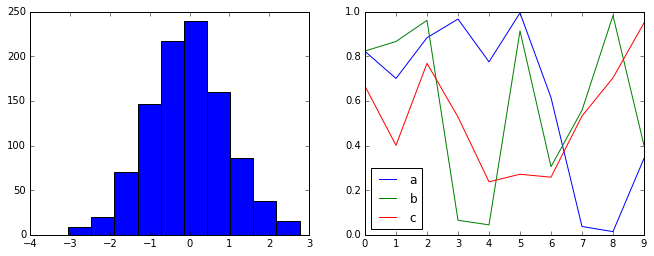

In [27]:
hist_and_lines()

### FiveThiryEight 樣式

``fivethirtyeight``樣式模仿FiveThirtyEight網站上所呈現的樣式(https://fivethirtyeight.com)，以大膽的顏色、粗線條，以及透明的軸為代表樣式。

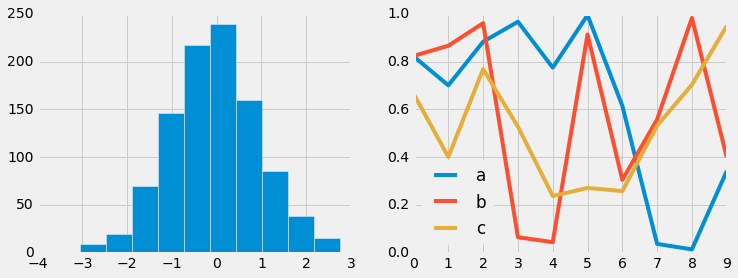

In [28]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

R語言中的``ggplot``套件是非常受歡迎的視覺化工具。
Matplotlib的``ggplot``樣式模仿這個套件的預設樣式。

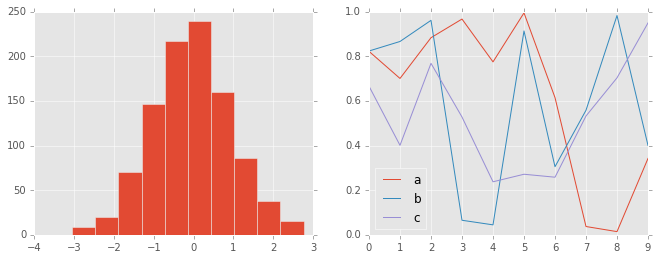

In [29]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers (BMH)樣式


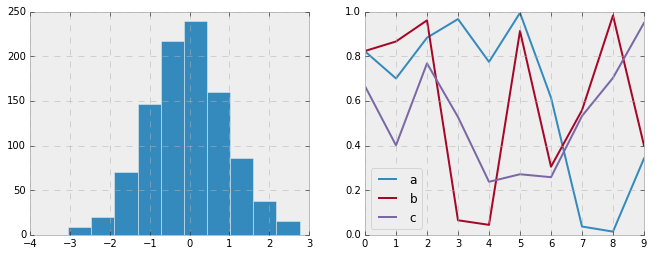

In [30]:
# 使用Matplotlib來特徵化BMH圖形
with plt.style.context('bmh'):
    hist_and_lines()

### 深色背景


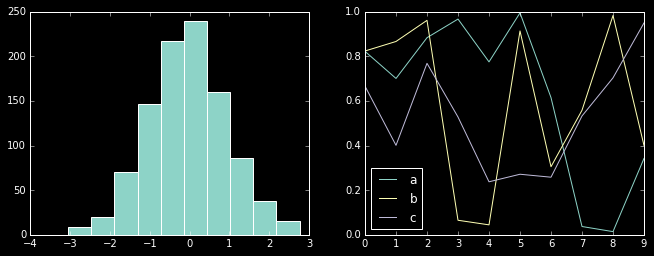

In [31]:
with plt.style.context('dark_background'):
    hist_and_lines()

### 灰階


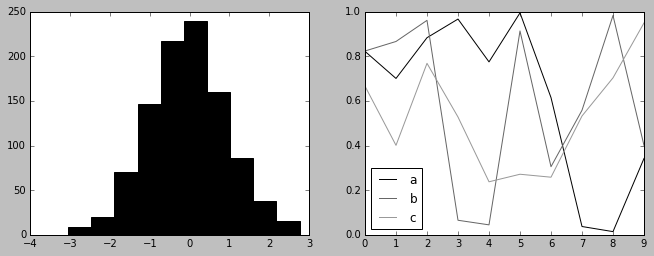

In [32]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn 樣式

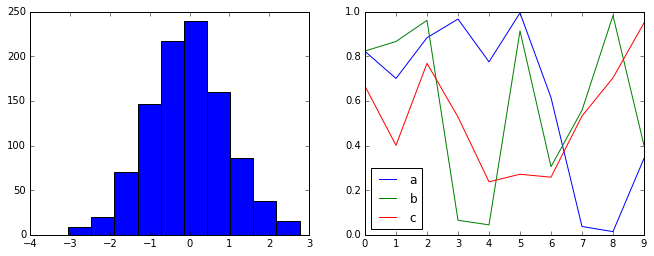

In [33]:
import seaborn
hist_and_lines()